In [1]:
import os
import sys
# Root folder
sys.path.append("../../..")

from PIL import Image

from apis.sam import SAM, visualize_image

In [2]:
segmentor = SAM()

## Test detection

In [3]:
import numpy as np
import time
file_path = "images/1.png"

# define the points and labels
x = 0.7
y = 0.7

image = Image.open(file_path)
width, height = image.size
print(width, height)
nb_predictions =  1 # Assuming one prediction per text query
nb_points_per_mask = 1  # Example number, can be changed

points = np.zeros((nb_predictions, nb_points_per_mask, 2))
points[0, 0, 0] = x
points[0, 0, 1] = y




# Number of predictions and number of points per mask
nb_predictions =  1 # Assuming one prediction per text query
nb_points_per_mask = 1  # Example number, can be changed


print(points)
point_labels = np.zeros((nb_predictions, nb_points_per_mask))
point_labels[0, 0] = 1
print(point_labels)

time1 = time.time()
mask_data = segmentor.segment_by_point_set(image=image, points=points, point_labels=point_labels)
time2 = time.time()
print("Time taken: ", time2-time1)
print(mask_data)

512 389
[[[0.7 0.7]]]
[[1.]]
Time taken:  0.40465593338012695
[{'segmentation': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])}]


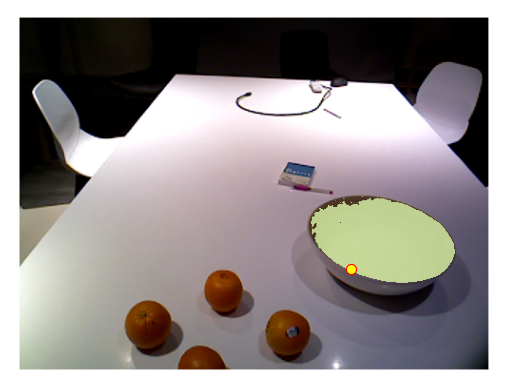

In [4]:
visualize_image(image, masks=[mask["segmentation"] for mask in mask_data], points=points[0])